In [37]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

In [38]:
# load the dataset
df = pd.read_csv(r"C:\Users\mac\Downloads\loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


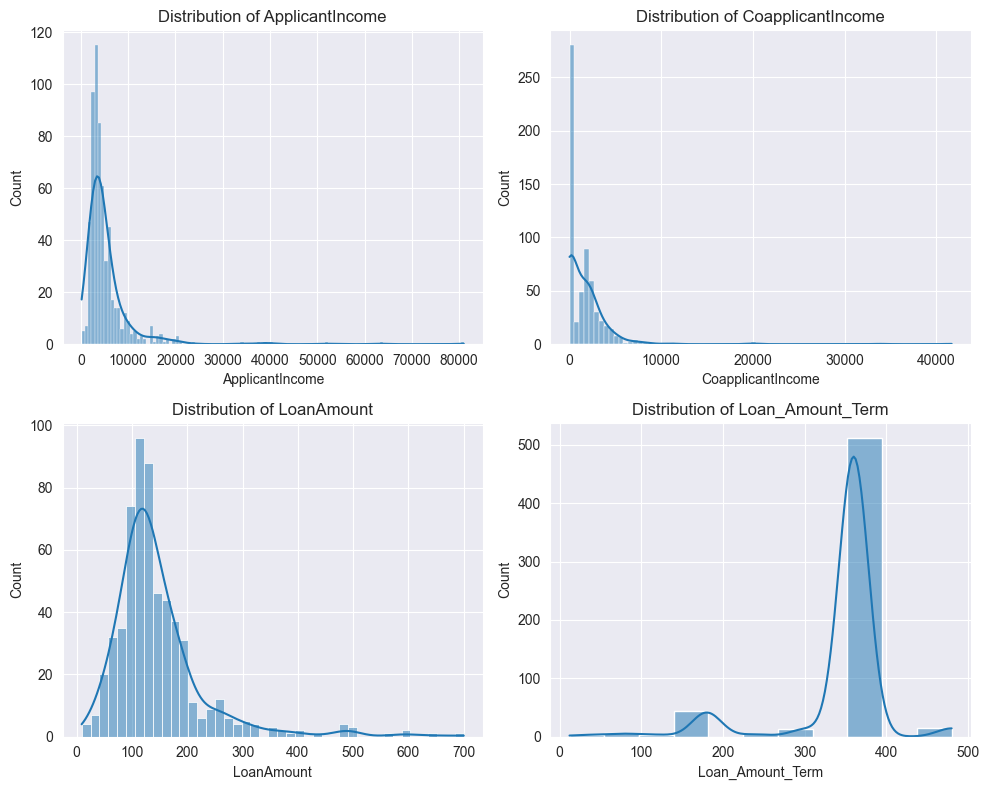

In [39]:
# distribution of numerical features

# Set up the plot for distribution analysis
plt.figure(figsize=(10, 8))

# Select key numerical features for distribution analysis
numerical_features = [
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
    'Loan_Amount_Term'
]

# Plot histograms for the selected numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

# Display the plots
plt.tight_layout()
plt.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder,QuantileTransformer

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

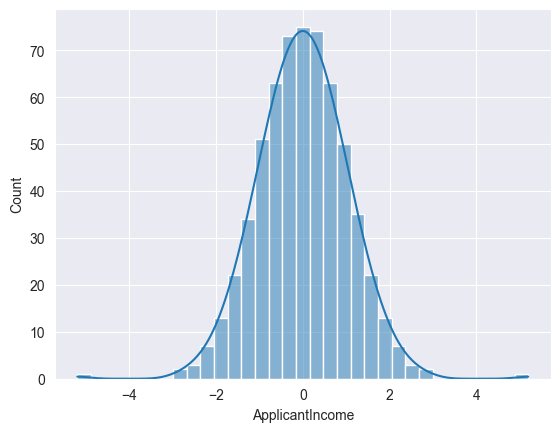

In [41]:
# drop Loan_ID column 
df = df.drop(['Loan_ID'], axis=1)

# encode categorical features
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = oe.fit_transform(df[i].values.reshape(-1, 1))

# scale the data
scaler = QuantileTransformer(output_distribution='normal')
columns_to_normalize =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df[columns_to_normalize]= scaler.fit_transform(df[columns_to_normalize])

#df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

#check distribution of the Applicant Income
sns.histplot(df['ApplicantIncome'], kde=True)

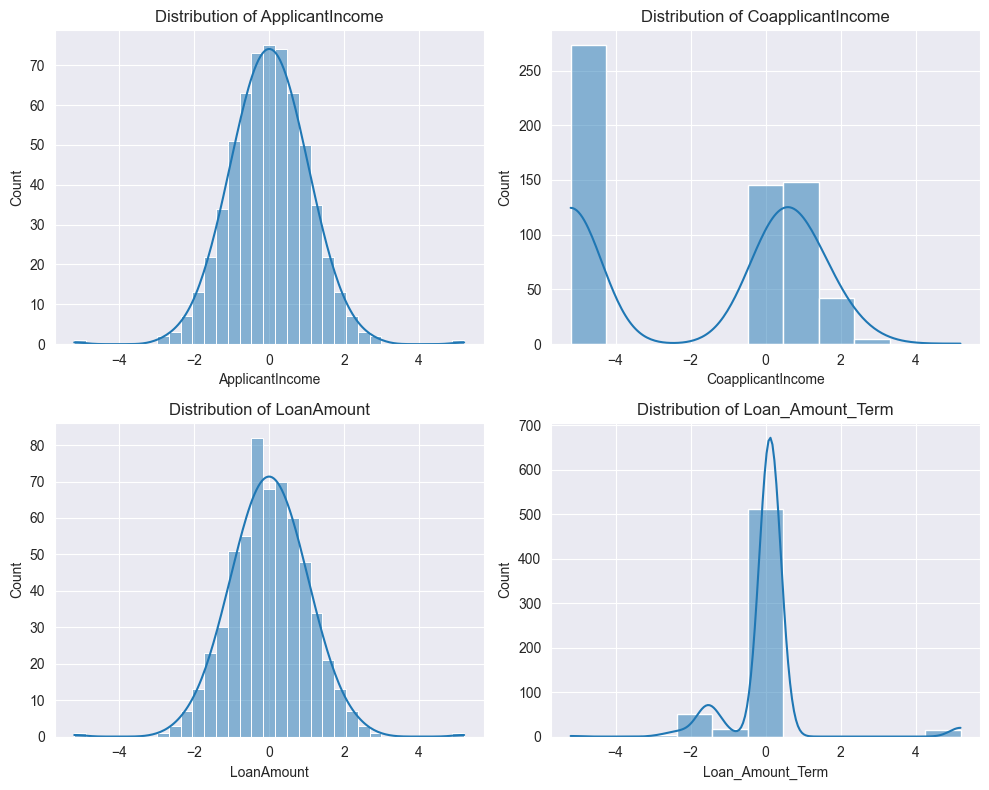

In [44]:
# distribution of numerical features

# Set up the plot for distribution analysis
plt.figure(figsize=(10, 8))

# Select key numerical features for distribution analysis
numerical_features = [
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
    'Loan_Amount_Term'
]

# Plot histograms for the selected numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

# Display the plots
plt.tight_layout()
plt.show()

In [45]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,0.706932,-5.199338,NaN,0.120923,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.309511,0.133290,0.018402,0.120923,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,-0.569037,-5.199338,-1.462675,0.120923,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,-0.889801,0.717472,-0.170521,0.120923,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.744176,-5.199338,0.318102,0.120923,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,-0.650301,-5.199338,-1.289024,0.120923,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,0.137417,-5.199338,-2.136651,-1.586786,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,1.108753,-0.129165,1.364382,0.120923,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,1.043103,-5.199338,0.955520,0.120923,1.0,2.0,1.0
